In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv('/content/drive/MyDrive/water quality prediction/Water/wqi.csv')

In [4]:
data.fillna(0, inplace=True)
data.head(5)

,Unnamed: 0,SL,DISTRICT,UPAZILA,WELL ID,OLD ID,DATETIME,year,TEMPERATURE,PH,TDS,CALCIUM,MAGNESIUM,SODIUM,POTASSIUM,CHLORIDE,BICARBONATE,SULPHATE,NITRATE,IRON,MANGANESE,BORON,SILICA,FLUORIDE,CARBONDIOXIDE,qn_tds,qn_sulphate,qn_sodium,qn_silica,qn_potassium,qn_pH,qn_nitrate,qn_MANGANESE,qn_MAGNESIUM,qn_IRON,qn_FLUORIDE,qn_CHLORIDE,qn_CARBONDIOXIDE,qn_CALCIUM,qn_BORON,qn_BICARBONATE,weight_tds,weight_sulphate,weight_sodium,weight_silica,weight_potassium,weight_pH,weight_nitrate,weight_MANGANESE,weight_MAGNESIUM,weight_IRON,weight_FLUORIDE,weight_CHLORIDE,weight_CARBONDIOXIDE,weight_CALCIUM,weight_BORON,weight_BICARBONATE,wqi
0,0,134,Chattogram,Satkania,GQ1582095,CHWQ095,06/12/2019,2019,26.4,6.67,534.0,32.05,17.85,285.43,3.38,25.2,60.0,2.0,0.4,0.49,0.58,0.83,49.23,0.23,69,106.80,0.50,142.715,164.100000,28.166667,703.882353,4.0,116.0,59.500000,49.0,23.0,16.800000,690.0,42.733333,83.0,32.786885,0.038818,0.000227,0.129679,0.994073,0.426565,15.049161,0.072693,42.161799,0.360435,8.904863,4.179833,0.020354,12.539500,0.103547,15.083747,0.032560,100.097855
1,1,133,Chattogram,Satkania,GQ1582095,CHWQ095,30/11/2019,2019,26.2,9.08,375.2,32.35,17.81,285.01,3.26,13.8,90.0,1.0,0.4,0.56,0.59,0.83,49.25,0.66,68,75.04,0.25,142.505,164.166667,27.166667,675.529412,4.0,118.0,59.366667,56.0,66.0,9.200000,680.0,43.133333,83.0,49.180328,0.027274,0.000114,0.129489,0.994477,0.411421,14.442969,0.072693,42.888726,0.359627,10.176986,11.994305,0.011146,12.357769,0.104516,15.083747,0.048840,109.104098
2,2,132,Chattogram,Satkania,GQ1582095,CHWQ095,21/10/2019,2019,26.3,7.05,508.9,32.20,18.36,286.98,3.12,40.1,200.0,1.0,0.3,1.95,0.60,0.84,50.25,0.61,66,101.78,0.25,143.490,167.500000,26.000000,699.411765,3.0,120.0,61.200000,195.0,61.0,26.733333,660.0,42.933333,84.0,109.289617,0.036993,0.000114,0.130384,1.014670,0.393752,14.953579,0.054520,43.615654,0.370733,35.437719,11.085645,0.032389,11.994305,0.104031,15.265479,0.108532,134.598498
3,3,131,Chattogram,Satkania,GQ1582095,CHWQ095,21/09/2019,2019,26.1,7.70,668.5,32.15,18.02,286.80,3.05,52.2,80.0,5.0,0.2,2.61,0.06,0.86,47.50,0.51,65,133.70,1.25,143.400,158.333333,25.416667,691.764706,2.0,12.0,60.066667,261.0,51.0,34.800000,650.0,42.866667,86.0,43.715847,0.048595,0.000568,0.130302,0.959141,0.384918,14.790083,0.036346,4.361565,0.363868,47.432024,9.268326,0.042162,11.812573,0.103870,15.628943,0.043413,105.406696
4,4,130,Chattogram,Satkania,GQ1582095,CHWQ095,21/08/2019,2019,27.3,7.40,570.5,32.05,17.92,284.70,3.02,52.9,55.0,5.0,0.3,2.05,0.07,0.87,47.62,0.58,69,114.10,1.25,142.350,158.733333,25.166667,695.294118,3.0,14.0,59.733333,205.0,58.0,35.266667,690.0,42.733333,87.0,30.054645,0.041471,0.000568,0.129348,0.961564,0.381132,14.865543,0.054520,5.088493,0.361848,37.255038,10.540450,0.042727,12.539500,0.103547,15.810675,0.029846,98.206269


In [5]:
#calculation overall wqi for each year
ag=data.groupby('year')['wqi'].mean()

In [6]:
ag.head()

year
2014     93.535002
2016     90.025102
2019    134.421894
Name: wqi, dtype: float64

In [7]:
data=ag.reset_index(level=0,inplace=False)
data

,year,wqi
0,2014,93.535002
1,2016,90.025102
2,2019,134.421894


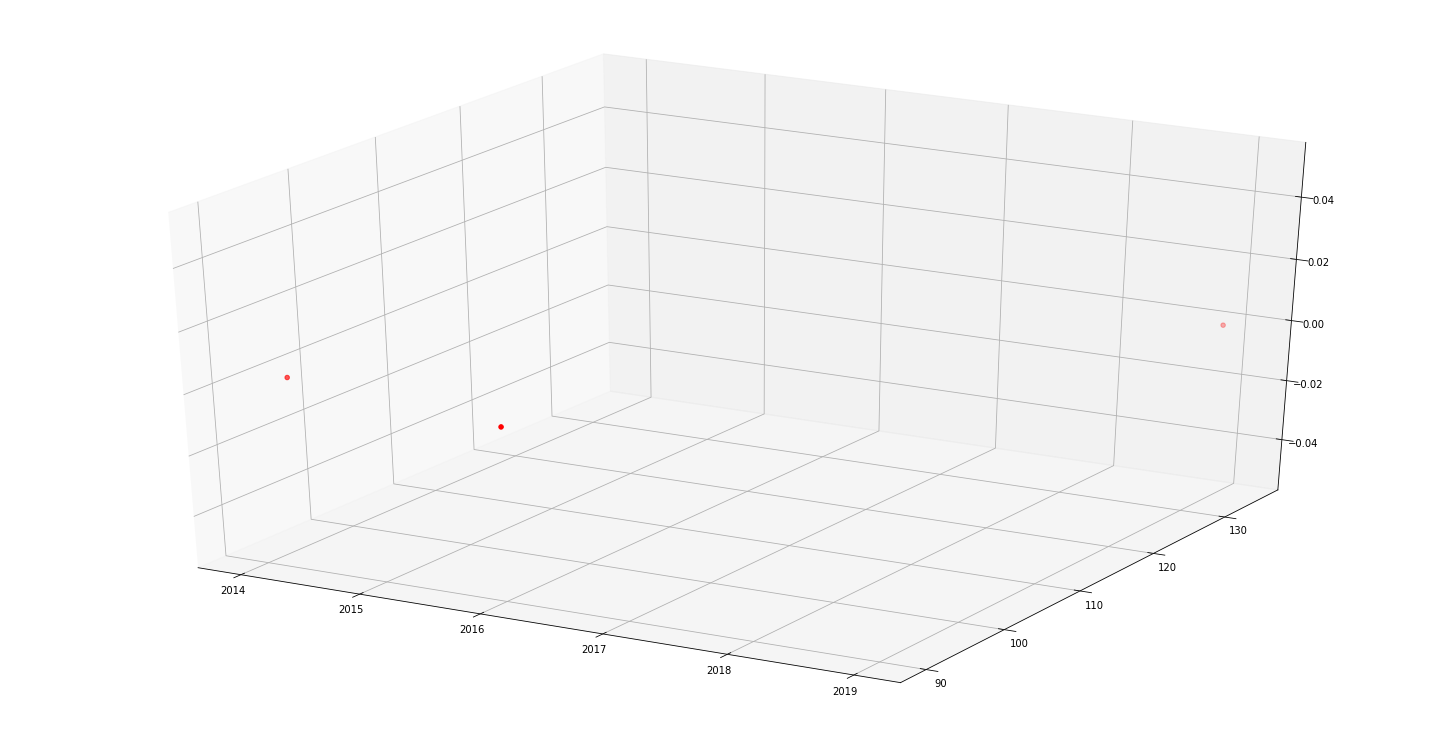

,year,wqi
0,2014,93.535002
1,2016,90.025102
2,2019,134.421894


In [8]:
#visualizing the filttered data

year=data['year'].values
AQI=data['wqi'].values
data['wqi']=pd.to_numeric(data['wqi'],errors='coerce')
data['year']=pd.to_numeric(data['year'],errors='coerce')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(year,AQI, color='red')
plt.show()
data

In [9]:
data = data[np.isfinite(data['wqi'])]
data.head()

,year,wqi
0,2014,93.535002
1,2016,90.025102
2,2019,134.421894


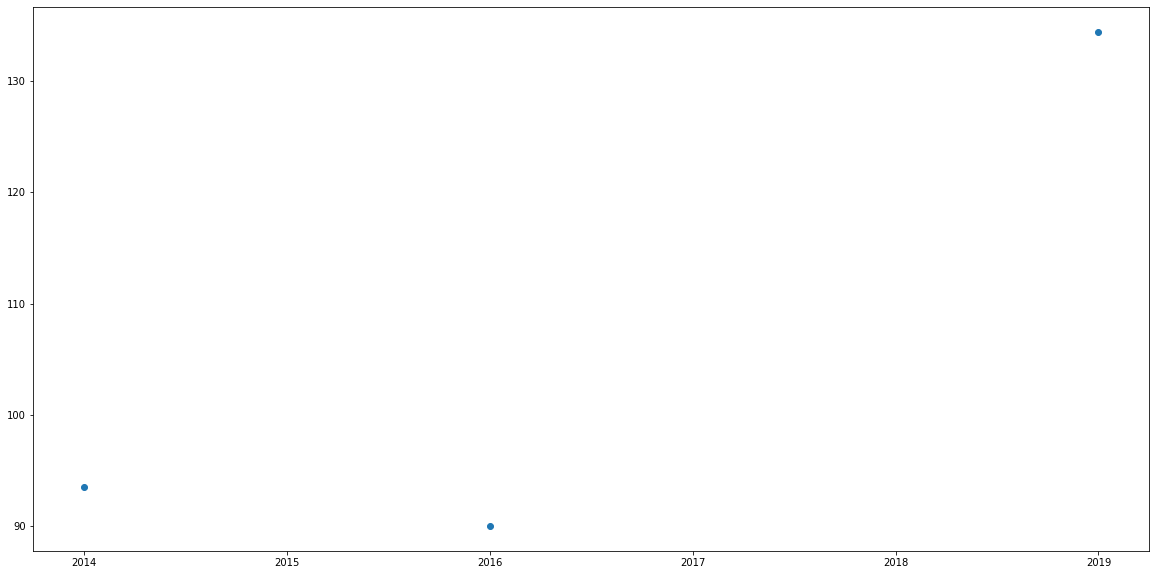

In [10]:
#scatter plot of data points
cols =['year']
y = data['wqi']
x=data[cols]

plt.scatter(x,y)
plt.show()

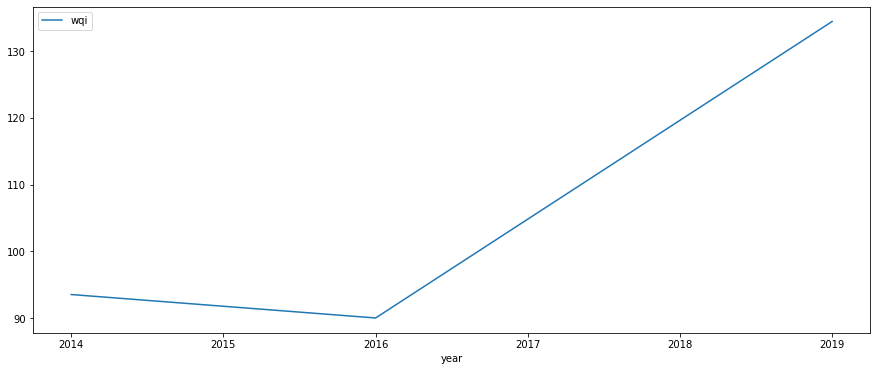

In [11]:
import matplotlib.pyplot as plt
data=data.set_index('year')
data.plot(figsize=(15,6))
plt.show()

In [12]:
from sklearn import neighbors,datasets
data=data.reset_index(level=0,inplace=False)
data

,year,wqi
0,2014,93.535002
1,2016,90.025102
2,2019,134.421894


In [13]:
#using linear regression to predict
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [14]:
cols =['year']

In [15]:
y = data['wqi']
x=data[cols]

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [17]:
# clf = linear_model.LinearRegression()
clf = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))

In [18]:
clf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [19]:
a=clf.predict(x_test)

In [20]:
a

array([107.85519578])

In [21]:
y_test

1    90.025102
Name: wqi, dtype: float64

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt 
print('mse:%.2f'%mean_squared_error(y_test,a))
print('rmse:%.2f'%sqrt(mean_squared_error(y_test, a)))
print('mae:%.2f'%sqrt(mean_absolute_error(y_test, a)))

mse:317.91
rmse:17.83
mae:4.22


In [23]:
dt = pd.DataFrame({'Actual': y_test, 'Predicted': a}) 

In [24]:
#using gradient descent to optimize it further
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        , -0.92717265],
       [ 1.        , -0.13245324],
       [ 1.        ,  1.05962589]])

In [25]:
alpha = 0.1 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking some random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 105.99, 21.89


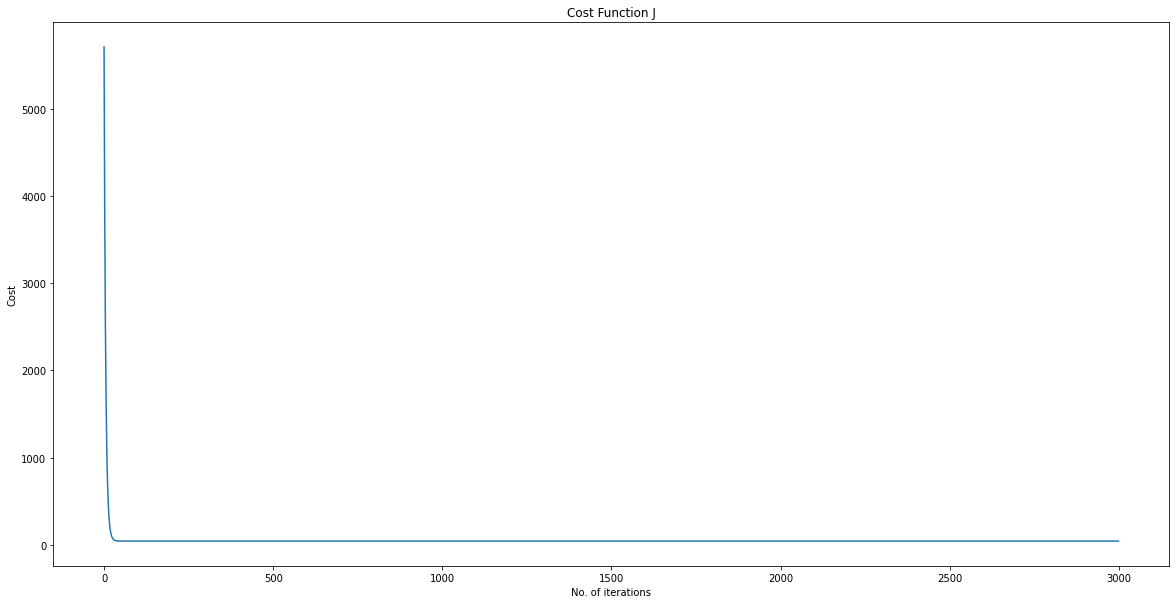

In [26]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [27]:
#prediction of january(2014, 2016, 2019) across Chattogram
import numpy as np
newB=[74.76, 2.13]

def rmse(y,y_pred):
    rmse= np.sqrt(sum(y-y_pred))
    return rmse
   

y_pred=x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
dt=pd.concat([data, dt], axis=1)
dt

,year,wqi,Actual,Predicted
0,2014,93.535002,93.535002,72.785122
1,2016,90.025102,90.025102,74.477875
2,2019,134.421894,134.421894,77.017003


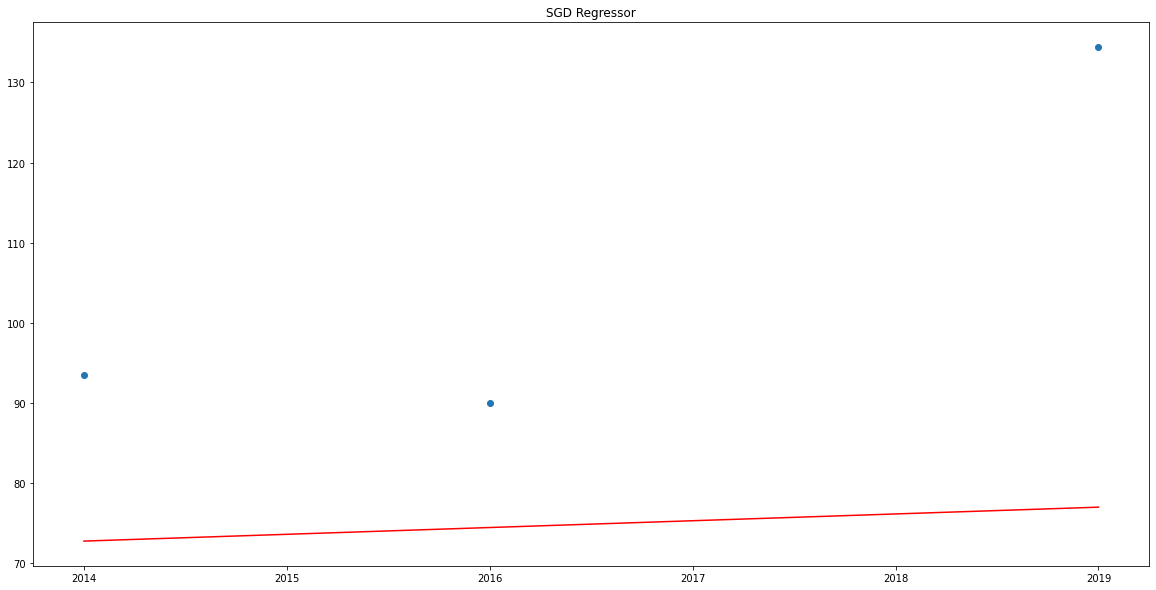

In [28]:
#plotting the actual and predicted results
x_axis=dt.year
y_axis=dt.Actual
y1_axis=dt.Predicted
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')
plt.title("SGD Regressor")

plt.show()